# Fashion-MNIST Image Classification using Deep Learning

## About the Project
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.The classes for labels are as follows:
0: T-shirt/top,
1: Trouser,
2: Pullover,
3: Dress,
4: Coat,
5: Sandal,
6: Shirt,
7: Sneakers,
8: Bag,
9: Ankle boot.

We need to build a Deep Learning model over this model to classify the images as per the classes. We will be utilising Convultional Neural Networks for this model with hyperparameters as follows:
  •Batch Size = 300, 
  •Number of Epochs = 25, 
  •Dense Classes = 10, 
  •Validation  Split = 0.2, 
  •Verbosity = 1, 
  •Optimizer : Adam, 
  •Loss Function : Sparse Categorical Cross Entropy, 
  •Activation Function : Relu and Softmax.

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
print(tf.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc1


## Loading Dataset from tensorflow.keras Fashion-MNIST 
We will load the dataframes from the dataset and then check their shapes and print a sample from dataframe. 

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_images[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0 

## Data Preprocessing
Each pixel value in dataframe  has a range from 0 to 255. and image has 2d array. So we need to  normalize it and reshape it with 1D array to train the convolutional neural network effeciently.Then we will again check the shapes of the dataframes and the pixel value.

In [3]:
train_images=train_images/255
train_images=train_images.reshape([60000,28,28,1])
train_images=train_images.astype(float)
train_labels=train_labels.astype(int)

test_images=test_images/255
test_images=test_images.reshape([10000,28,28,1])
test_images=test_images.astype(float)
test_labels=test_labels.astype(int)

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

## Sample Data Visualisation
We will display sample images from training data.

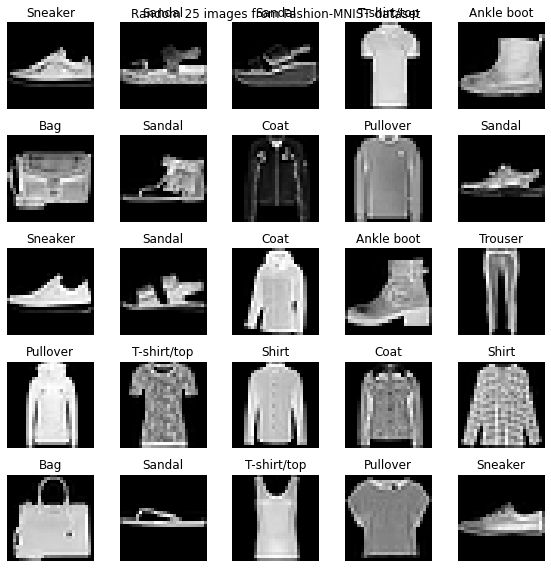

In [6]:
labels={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

fig=plt.figure(figsize=(8,8))
for i in range (1,26):
    img_no=np.random.randint(len(train_images))
    img=train_images[img_no].reshape([28,28])
    label=labels[train_labels[img_no]]

    fig.add_subplot(5,5,i)
    plt.title(label)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
fig.suptitle("Random 25 images from Fashion-MNIST dataset")
plt.show()

## Building CNN
We will define our model configurations for easier tuning, then add Layers to the model. We will use 2D convolution layers,MaxPooling layers, Flatten Layer and Dense Layers. We also use aadditional Dropout Layers to avoid overfitting and BatchNormalization Layers to normalize the inputs. The we will plot the model architecture.

In [7]:
bt_sz = 300
ephs_no = 25
cls_dense = 10
val_split = 0.2
verbosity = 1

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),padding = 'same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),padding = 'same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(cls_dense,activation='softmax'),
    
])

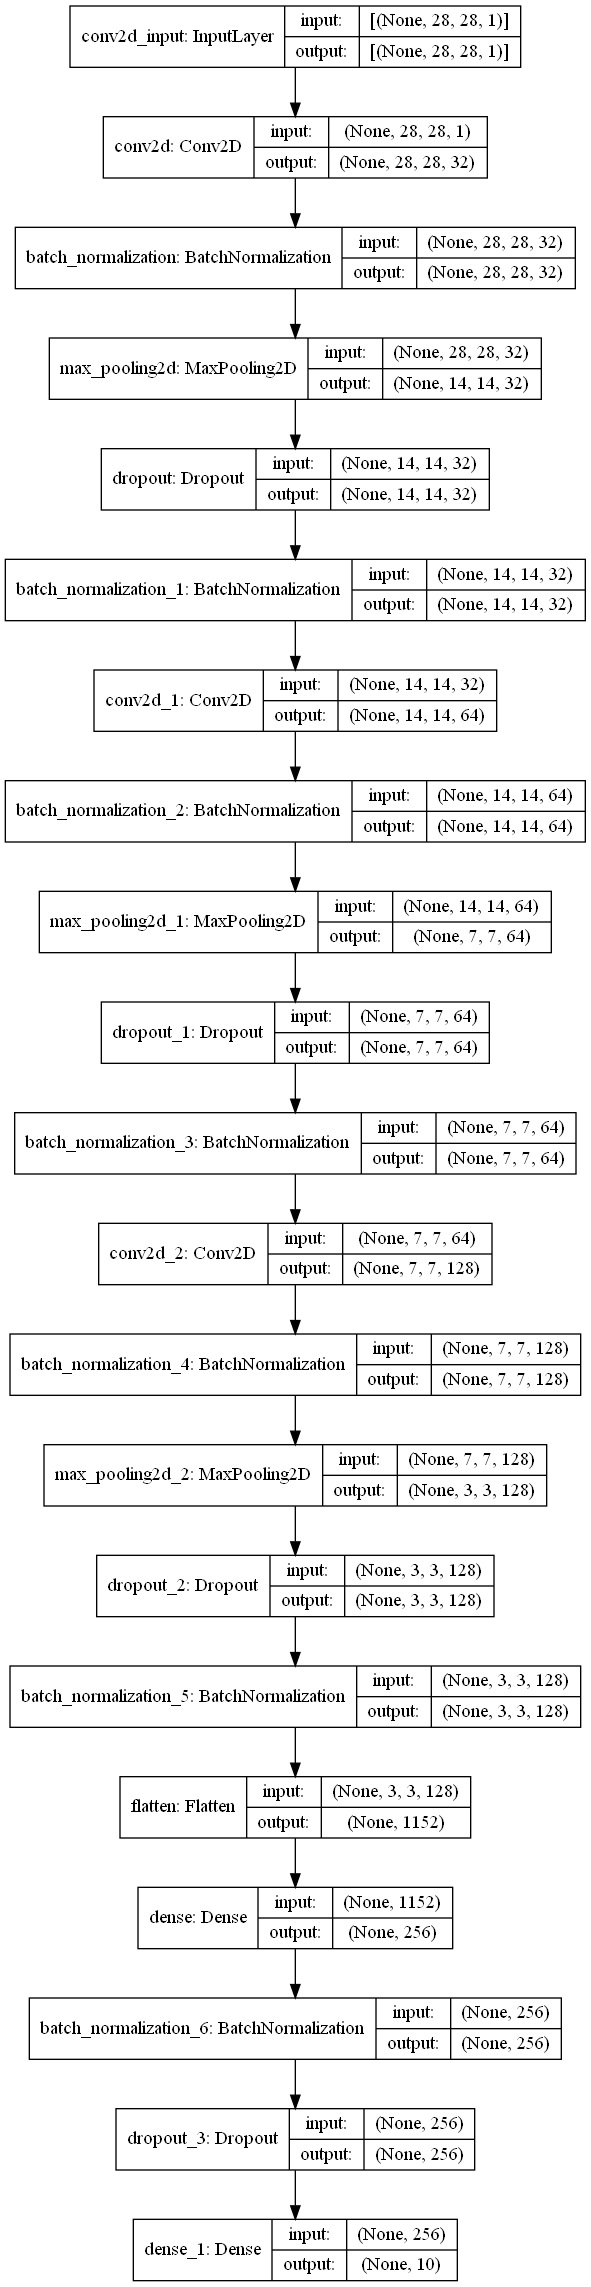

In [9]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        2

## Compiling Model
We need to compile the model to trains and define the loss function and optimizer beforehand. We will use the most common optimizer Adam .

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the  Model
We will now train the model over training datasets and fetch hyperparametrs like batch size, number of epochs,etc specified before.

In [12]:
history=model.fit(train_images,train_labels,batch_size=bt_sz,epochs=ephs_no,validation_split=val_split,verbose=verbosity)

Epoch 1/25
160/160 [==============================] - 68s 416ms/step - loss: 0.9644 - accuracy: 0.6937 - val_loss: 2.8553 - val_accuracy: 0.1044
Epoch 2/25
160/160 [==============================] - 68s 422ms/step - loss: 0.4274 - accuracy: 0.8466 - val_loss: 1.6180 - val_accuracy: 0.4820
Epoch 3/25
160/160 [==============================] - 68s 425ms/step - loss: 0.3488 - accuracy: 0.8731 - val_loss: 0.6892 - val_accuracy: 0.7347
Epoch 4/25
160/160 [==============================] - 69s 430ms/step - loss: 0.3119 - accuracy: 0.8849 - val_loss: 0.3256 - val_accuracy: 0.8791
Epoch 5/25
160/160 [==============================] - 69s 428ms/step - loss: 0.2829 - accuracy: 0.8963 - val_loss: 0.2642 - val_accuracy: 0.8998
Epoch 6/25
160/160 [==============================] - 69s 429ms/step - loss: 0.2612 - accuracy: 0.9044 - val_loss: 0.2497 - val_accuracy: 0.9107
Epoch 7/25
160/160 [==============================] - 69s 430ms/step - loss: 0.2465 - accuracy: 0.9089 - val_loss: 0.2416 - val_ac

## Predicting using the Model and Validation and Displaying Sample Predictions.
We will apply the model on test dataset to predict the classes. then we will validate the results with known actual labels.We will also plot sample test images and display their predictions and if False then the title font color is red.

In [13]:
pred_labels=model.predict(test_images)

In [14]:
print(pred_labels.shape)
pred_labels[10]

(10000, 10)


array([8.87043370e-06, 9.81051380e-06, 1.25674426e-03, 1.52530265e-05,
       9.85707343e-01, 1.26016528e-06, 1.29971113e-02, 1.05957793e-06,
       9.54819441e-08, 2.45777278e-06], dtype=float32)

In [15]:
pred_labels_index=np.argmax(pred_labels,axis=1)

In [16]:
pred_labels_index[10]

4

In [17]:
test_labels[10]

4

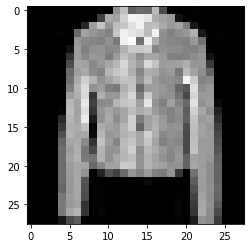

In [18]:
plt.imshow(test_images[10],cmap='gray')

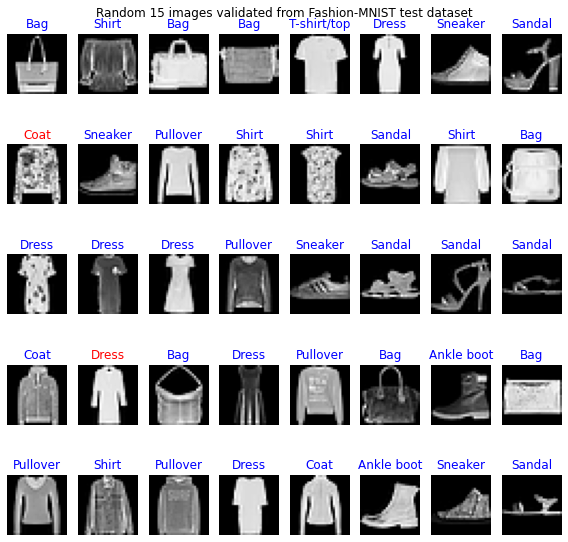

In [19]:
fig=plt.figure(figsize=(8,8))
for m in range (1,41):
    test_img_no=np.random.randint(len(test_images))
    test_img=test_images[test_img_no].reshape([28,28])
    act_label=labels[test_labels[test_img_no]]
    pred_label=labels[pred_labels_index[test_img_no]]

    fig.add_subplot(5,8,m)
    if pred_labels_index[test_img_no]==test_labels[test_img_no]:
        plt.title(pred_label,color='blue')
    else:
        plt.title(pred_label,color='red')
    plt.imshow(test_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
fig.suptitle("Random 15 images validated from Fashion-MNIST test dataset")
plt.show()

##  Model Evaluation
We will evaluate the model using model.evaluate to know the loss and accuracy of the model. We will then plot the Accuracy and Loss vs Epochs for training and validation data. Then we will Plot Confusion Matrix and Classification Report. 

In [20]:
loss,acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2174 - accuracy: 0.9261


In [21]:
print('Loss: ',round(loss,2))
print('Accuracy: ',round(acc*100,2))

Loss:  0.22
Accuracy:  92.61


In [22]:
model_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
model_loss = history.history['loss']
val_loss = history.history['val_loss']

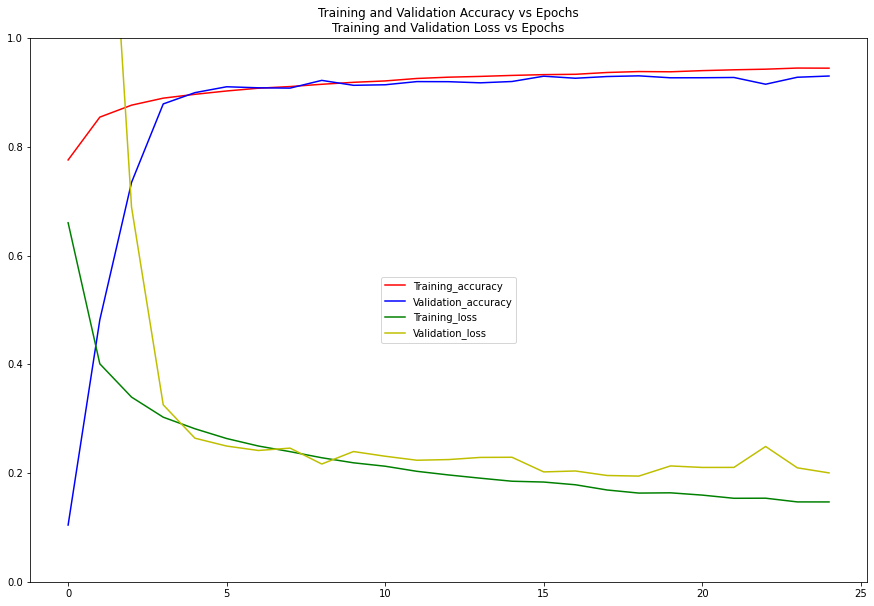

In [23]:
epochs = range(len(model_acc))

fig=plt.figure(figsize=(15,10))
plt.plot(epochs,model_acc,'r',label = 'Training_accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation_accuracy')
plt.plot(epochs,model_loss,'g',label='Training_loss')
plt.plot(epochs,val_loss,'y',label='Validation_loss')
plt.title('Training and Validation Accuracy vs Epochs''\n''Training and Validation Loss vs Epochs')
plt.ylim(0,1)
plt.legend(loc='center')
plt.axis('on')

plt.show()

We can observe from the graph that both the accuracies are developing over time and the accuracy is quiet high as number of epochs increases. Similarly we can observe the losses decreasing over the number of epochs which is a good feature. This states that model is not undertrained as it is with good values and not overtrained as the values are not saturated. 

### Confusion  Matrix

<AxesSubplot:>

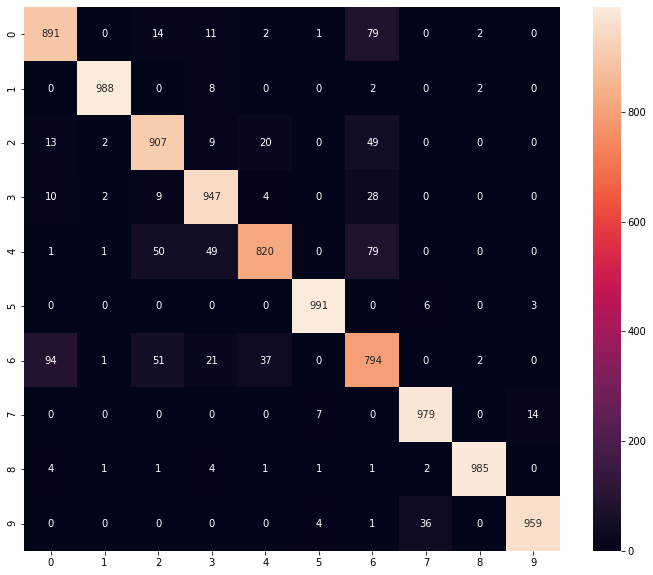

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,pred_labels_index)
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='d')

The confusion matrix helps us understand the Correct Predictions and Incorrect predictions. The True Labels are in rows and Predictions are in coulmns. We can observed the maximum false predictions are for T-shirt/Top(0) predicted as Shirt(6).

### Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,pred_labels_index))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.91      0.89      1000
           3       0.90      0.95      0.92      1000
           4       0.93      0.82      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.77      0.79      0.78      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print('F1_Score: ',round(f1_score(test_labels,pred_labels_index,average='weighted')*100,2),'%')
print('Precision: ',round(precision_score(test_labels,pred_labels_index,average='weighted')*100,2),'%')

F1_Score:  92.61 %
Precision:  92.71 %


We can observe that F1_score i.e the percentage of correct Positive predictions is above 90% and the Precision Score i.e the percentage of correct predictions in all is also above 90%. This gives us idea about performance of our classifier model and it is pretty good. 

## Save the Model

In [36]:
model.save('Regex_project_Fashion_CNN.h5')